In [58]:
import pandas as pd
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt

# US

In [43]:
#category id and category for US
with open ('US_category_id.json') as us:
    us_id = json.load(us)
#pprint(us_id)
us_category={}
for item in us_id['items']:
    us_category[item['id']] = item['snippet']['title']
#us_category

In [33]:
us = pd.read_csv("USvideos.csv")
us.head()
us.dtypes
us['trending_date'] = pd.to_datetime(us['trending_date'], format = '%y.%d.%m')
us['trending_YearMonth'] = us['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
us['publish_time'] = pd.to_datetime(us['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
us_max_byMonth = us.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max() # category_id included as an index
us_view_max_byMonth = us_max_byMonth['views'].groupby(level=0, group_keys=False)
us_top20_byMonth = us_view_max_byMonth.nlargest(20)
us_top20_byMonth= us_top20_byMonth.reset_index(level=2)  # this is how to convert category_id from an index into a regular column
us_top20_byMonth['category_id'] = us_top20_byMonth['category_id'].astype(str)
us_top20_byMonth['category'] = us_top20_byMonth['category_id'].map(lambda x: us_category.get(x))
us_top20_byMonth

category_id  \
trending_YearMonth title                                                            
2017-11            Luis Fonsi, Demi Lovato - Échame La Culpa                   10   
                   Ed Sheeran - Perfect (Official Music Video)                 10   
                   Marvel Studios' Avengers: Infinity War Official...          24   
                   Incredibles 2 Official Teaser Trailer                        1   
                   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offic...          10   
                   Eminem - Walk On Water (Audio) ft. Beyoncé                  10   
                   P!nk - Beautiful Trauma (Official Video)                    10   
                   Selena Gomez, Marshmello - Wolves                           10   
                   Jennifer Lopez - Amor, Amor, Amor (Official Vid...          10   
                   RAMPAGE - OFFICIAL TRAILER 1 [HD]                           24   
                   Stranger Things Cast Answer the Web's Most Sear...          24   
                   Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV                       10   
                   Deadpool’s “Wet on Wet” Teaser                               1   
                   Spill Your Guts or Fill Your Guts w/ Kim Kardas...          24   
                   What's new, Atlas?                                          28   
                   Harry Styles - Kiwi                                         10   
                   Hailee Steinfeld, Alesso - Let Me Go ft. Florid...          10   
                   John Lewis Christmas Ad 2017 - #MozTheMonster               26   
                   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offic...          10   
                   OK Go - Obsession - Official Video                          10   
2017-12            YouTube Rewind: The Shape of 2017 | #YouTubeRewind          24   
                   Marvel Studios' Avengers: Infinity War Official...          24   
                   42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE            26   
                   TWICE Heart Shaker M/V                                      10   
                   G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi B...          10   
                   Jurassic World: Fallen Kingdom - Official Trail...          24   
                   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offic...          10   
                   Ed Sheeran - Perfect Duet (with Beyoncé) [Offic...          10   
                   Katy Perry - Hey Hey Hey (Official)                         10   
                   Demi Lovato - Tell Me You Love Me                           10   
...                                                                           ...   
2018-5             Do You Hear Yanny or Laurel? (SOLVED with SCIENCE)          28   
                   Liam Payne & J Balvin - Familiar (Official Video)           10   
                   Jennifer Lopez - El Anillo (Official Video)                 10   
                   Selena Gomez - Back To You (Lyric Video)                     1   
                   Nicki Minaj - Chun-Li                                       10   
                   Shawn Mendes - Youth (Lyric Video) ft. Khalid               10   
                   BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' ...          10   
                   Abraham Mateo, Yandel, Jennifer Lopez - Se Acab...          10   
                   Daddy Yankee - Hielo (Video Oficial)                        10   
                   Céline Dion - Ashes (from the Deadpool 2 Motion...          10   
2018-6             Childish Gambino - This Is America (Official Vi...          10   
                   BTS (방탄소년단) 'FAKE LOVE' Official MV                         10   
                   Cardi B, Bad Bunny & J Balvin - I Like It [Offi...          10   
                   Maroon 5 - Girls Like You ft. Cardi B                       10   
                   Selena Gomez - Back To You (Lyric Video)                

# GB

In [34]:
with open ('GB_category_id.json') as gb:
    gb_id = json.load(gb)
gb_category={}
for item in gb_id['items']:
    gb_category[item['id']] = item['snippet']['title']
gb_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [42]:
gb = pd.read_csv("GBvideos.csv")
gb.head()
gb.dtypes
gb['trending_date'] = pd.to_datetime(gb['trending_date'], format = '%y.%d.%m')
gb['trending_YearMonth'] = gb['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
gb['publish_time'] = pd.to_datetime(gb['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
gb_max_byMonth = gb.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
gb_view_max_byMonth = gb_max_byMonth['views'].groupby(level=0, group_keys=False)
gb_top20_byMonth = gb_view_max_byMonth.nlargest(20)
gb_top20_byMonth= gb_top20_byMonth.reset_index(level=2)
gb_top20_byMonth['category_id'] = gb_top20_byMonth['category_id'].astype(str)
gb_top20_byMonth['category'] = gb_top20_byMonth['category_id'].map(lambda x: gb_category.get(x))
gb_top20_byMonth

category_id  \
trending_YearMonth title                                                            
2017-11            Ed Sheeran - Perfect (Official Music Video)                 10   
                   Eminem - Walk On Water (Audio) ft. Beyoncé                  10   
                   Post Malone - rockstar ft. 21 Savage                        10   
                   Marvel Studios' Avengers: Infinity War Official...          24   
                   Post Malone - rockstar ft. 21 Savage (Official ...          10   
                   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offic...          10   
                   Jennifer Lopez - Amor, Amor, Amor (Official Vid...          10   
                   Taylor Swift - Call It What You Want (Lyric Video)          10   
                   P!nk - Beautiful Trauma (Official Video)                    10   
                   RAMPAGE - OFFICIAL TRAILER 1 [HD]                           24   
                   Chayanne - Choka Choka (Official Video) ft. Ozuna           10   
                   Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV                       10   
                   Samsung Galaxy: Growing Up                                  24   
                   Migos, Nicki Minaj, Cardi B - MotorSport (Audio)            10   
                   Camila Cabello - Havana (Vertical Video) ft. Yo...          10   
                   DJ Snake, Lauv - A Different Way                            10   
                   N.E.R.D & Rihanna - Lemon                                   10   
                   Harry Styles - Kiwi                                         10   
                   Spill Your Guts or Fill Your Guts w/ Kim Kardas...          24   
                   Stranger Things Cast Answer the Web's Most Sear...          24   
2017-12            YouTube Rewind: The Shape of 2017 | #YouTubeRewind          24   
                   Luis Fonsi, Demi Lovato - Échame La Culpa                   10   
                   Marvel Studios' Avengers: Infinity War Official...          24   
                   Ed Sheeran - Perfect Duet (with Beyoncé) [Offic...          10   
                   Post Malone - rockstar ft. 21 Savage                        10   
                   TWICE Heart Shaker M/V                                      10   
                   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offic...          10   
                   Anitta & J Balvin - Downtown (Official Lyric Vi...          23   
                   Jurassic World: Fallen Kingdom - Official Trail...          24   
                   G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi B...          10   
...                                                                           ...   
2018-5             Sebastián Yatra - Por Perro ft. Luis Figueroa, ...          10   
                   Ed Sheeran - Happier (Official Video)                       10   
                   Shawn Mendes - In My Blood                                  10   
                   6IX9INE Gotti (WSHH Exclusive - Official Music ...          10   
                   Maluma - Marinero (Official Video)                          10   
                   ZAYN - Let Me (Official Video)                              10   
                   VENOM - Official Trailer (HD)                               24   
                   Cardi B, Bad Bunny & J Balvin - I Like It [Offi...          10   
                   Nicki Minaj - Chun-Li                                       10   
                   Liam Payne & J Balvin - Familiar (Official Video)           10   
2018-6             Childish Gambino - This Is America (Official Vi...          10   
                   Ozuna - Única (Video Oficial) 🐻 A U R A                    10   
                   BTS (방탄소년단) 'FAKE LOVE' Official MV                         10   
                   Calvin Harris, Dua Lipa - One Kiss (Official Vi...          10   
                   Cardi B, Bad Bunny & J Balvin - I Like It [Offi...      

# CA

In [35]:
with open ('CA_category_id.json') as ca:
    ca_id = json.load(ca)
ca_category={}
for item in ca_id['items']:
    ca_category[item['id']] = item['snippet']['title']
ca_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [41]:
ca = pd.read_csv("CAvideos.csv")
ca.head()
ca.dtypes
ca['trending_date'] = pd.to_datetime(ca['trending_date'], format = '%y.%d.%m')
ca['trending_YearMonth'] = ca['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
ca['publish_time'] = pd.to_datetime(ca['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
ca_max_byMonth = ca.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
ca_view_max_byMonth = ca_max_byMonth['views'].groupby(level=0, group_keys=False)
ca_top20_byMonth = ca_view_max_byMonth.nlargest(20)
ca_top20_byMonth= ca_top20_byMonth.reset_index(level=2)
ca_top20_byMonth['category_id'] = ca_top20_byMonth['category_id'].astype(str)
ca_top20_byMonth['category'] = ca_top20_byMonth['category_id'].map(lambda x: ca_category.get(x))
ca_top20_byMonth

category_id  \
trending_YearMonth title                                                            
2017-11            Luis Fonsi, Demi Lovato - Échame La Culpa                   10   
                   Ed Sheeran - Perfect (Official Music Video)                 10   
                   Marvel Studios' Avengers: Infinity War Official...          24   
                   Post Malone - rockstar ft. 21 Savage                        10   
                   Swag Se Swagat Song | Tiger Zinda Hai | Salman ...          10   
                   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offic...          10   
                   Incredibles 2 Official Teaser Trailer                        1   
                   Eminem - Walk On Water (Audio) ft. Beyoncé                  10   
                   Romeo Santos, Daddy Yankee, Nicky Jam - Bella y...          10   
                   DJ (Duvvada Jagannadham) 2017 New Released Full...           1   
                   P!nk - Beautiful Trauma (Official Video)                    10   
                   RAMPAGE - OFFICIAL TRAILER 1 [HD]                           24   
                   Water Bottle Flip 2 | Dude Perfect                          17   
                   Jennifer Lopez - Amor, Amor, Amor (Official Vid...          10   
                   Jake Paul - It's Everyday Bro (Remix) [feat. Gu...          22   
                   Stranger Things Cast Answer the Web's Most Sear...          24   
                   Padmavati : Ek Dil Ek Jaan Video Song | Deepika...          10   
                   Deadpool’s “Wet on Wet” Teaser                               1   
                   Spill Your Guts or Fill Your Guts w/ Kim Kardas...          24   
                   What's new, Atlas?                                          28   
2017-12            YouTube Rewind: The Shape of 2017 | #YouTubeRewind          24   
                   Marvel Studios' Avengers: Infinity War Official...          24   
                   Jurassic World: Fallen Kingdom - Official Trail...          24   
                   42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE            26   
                   TWICE Heart Shaker M/V                                      10   
                   Ed Sheeran - Perfect Duet (with Beyoncé) [Offic...          10   
                   Yo Yo Honey Singh: DIL CHORI (Video) Simar Kaur...          10   
                   G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi B...          10   
                   Naah -  Harrdy Sandhu Feat. Nora Fatehi | Jaani...          10   
                   PADMAN Official Trailer | Akshay Kumar | Sonam ...          24   
...                                                                           ...   
2018-5             BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' ...          10   
                   Karol G - Mi Cama                                           10   
                   Marvel Studios' Ant-Man and The Wasp - Official...          24   
                   Yanny vs Laurel video: which name do you hear? ...          28   
                   Babysitter Hears Noise Upstairs, So Dad Checks ...          24   
                   Deadpool 2 | With Apologies to David Beckham                 1   
                   MANKIRT AULAKH - DARU BAND (Official Video) | L...          10   
                   Céline Dion - Ashes (from the Deadpool 2 Motion...          10   
                   Fortnite with Ninja | Dude Perfect                          17   
                   Jhay Cortez, J. Balvin - Están Pa´ Mí                       10   
2018-6             Maroon 5 - Girls Like You ft. Cardi B                       10   
                   Cardi B, Bad Bunny & J Balvin - I Like It [Offi...          10   
                   Sanju | Official Trailer | Ranbir Kapoor | Rajk...          24   
                   we broke up                                                 22   
                   Dhadak | Official Trailer | Janhvi & Ishaan | S...      

# DE

In [40]:
with open ('DE_category_id.json') as de:
    de_id = json.load(de)
de_category={}
for item in de_id['items']:
    de_category[item['id']] = item['snippet']['title']
de_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [39]:
de = pd.read_csv("DEvideos.csv")
de.head()
de.dtypes
de['trending_date'] = pd.to_datetime(de['trending_date'], format = '%y.%d.%m')
de['trending_YearMonth'] = de['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
de['publish_time'] = pd.to_datetime(de['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
de_max_byMonth = de.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
de_view_max_byMonth = de_max_byMonth['views'].groupby(level=0, group_keys=False)
de_top20_byMonth = de_view_max_byMonth.nlargest(20)
de_top20_byMonth= de_top20_byMonth.reset_index(level=2)
de_top20_byMonth['category_id'] = de_top20_byMonth['category_id'].astype(str)
de_top20_byMonth['category'] = de_top20_byMonth['category_id'].map(lambda x: de_category.get(x))
de_top20_byMonth

category_id  \
trending_YearMonth title                                                            
2017-11            Luis Fonsi, Demi Lovato - Échame La Culpa                   10   
                   Marvel Studios' Avengers: Infinity War Official...          24   
                   Ed Sheeran - Perfect (Official Music Video)                 10   
                   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offic...          10   
                   Incredibles 2 Official Teaser Trailer                        1   
                   Post Malone - rockstar ft. 21 Savage                        10   
                   Eminem - Walk On Water (Audio) ft. Beyoncé                  10   
                   Water Bottle Flip 2 | Dude Perfect                          17   
                   Stranger Things Cast Answer the Web's Most Sear...          24   
                   P!nk - Beautiful Trauma (Official Video)                    10   
                   Spill Your Guts or Fill Your Guts w/ Kim Kardas...          24   
                   DJ (Duvvada Jagannadham) 2017 New Released Full...           1   
                   Deadpool’s “Wet on Wet” Teaser                               1   
                   What's new, Atlas?                                          28   
                   Jake Paul - It's Everyday Bro (Remix) [feat. Gu...          22   
                   RAMPAGE - OFFICIAL TRAILER 1 [HD]                           24   
                   Miss World 2017 - Crowning Moment                           22   
                   Selena Gomez, Marshmello - Wolves                           10   
                   The New SpotMini                                            28   
                   The Trump Presidency: Last Week Tonight with Jo...          24   
2017-12            YouTube Rewind: The Shape of 2017 | #YouTubeRewind          24   
                   Marvel Studios' Avengers: Infinity War Official...          24   
                   Jurassic World: Fallen Kingdom - Official Trail...          24   
                   PADMAN Official Trailer | Akshay Kumar | Sonam ...          24   
                   Ed Sheeran - Perfect Symphony (with Andrea Boce...          10   
                   Ed Sheeran - Perfect Duet (with Beyoncé) [Offic...          10   
                   TWICE Heart Shaker M/V                                      10   
                   Demi Lovato - Tell Me You Love Me                           10   
                   Katy Perry - Hey Hey Hey (Official)                         10   
                   Migos, Nicki Minaj, Cardi B - MotorSport                    10   
...                                                                           ...   
2018-5             BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' ...          10   
                   Jhay Cortez, J. Balvin - Están Pa´ Mí                       10   
                   Marvel Studios' Ant-Man and The Wasp - Official...          24   
                   Clash Royale: Meet the Rascals! (New Card!)                 20   
                   Yanny vs Laurel video: which name do you hear? ...          28   
                   Deadpool 2 | With Apologies to David Beckham                 1   
                   Fortnite with Ninja | Dude Perfect                          17   
                   Calvin Harris, Dua Lipa - One Kiss (Official Vi...          10   
                   360 Google Doodles/Spotlight Stories: Back to t...           1   
                   Mission: Impossible - Fallout (2018) - Official...           1   
2018-6             Cardi B, Bad Bunny & J Balvin - I Like It [Offi...          10   
                   Maroon 5 - Girls Like You ft. Cardi B                       10   
                   Dhadak | Official Trailer | Janhvi & Ishaan | S...           1   
                   we broke up                                                 22   
                   Sanju | Official Trailer | Ranbir Kapoor | Rajk...      

# FR

In [37]:
with open ('FR_category_id.json') as fr:
    fr_id = json.load(fr)
fr_category={}
for item in fr_id['items']:
    fr_category[item['id']] = item['snippet']['title']
fr_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [38]:
fr = pd.read_csv("FRvideos.csv")
fr.head()
fr.dtypes
fr['trending_date'] = pd.to_datetime(fr['trending_date'], format = '%y.%d.%m')
fr['trending_YearMonth'] = fr['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
fr['publish_time'] = pd.to_datetime(fr['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
fr_max_byMonth = fr.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
fr_view_max_byMonth = fr_max_byMonth['views'].groupby(level=0, group_keys=False)
fr_top20_byMonth = fr_view_max_byMonth.nlargest(20)
fr_top20_byMonth= fr_top20_byMonth.reset_index(level=2)
fr_top20_byMonth['category_id'] = fr_top20_byMonth['category_id'].astype(str)
fr_top20_byMonth['category'] = fr_top20_byMonth['category_id'].map(lambda x: fr_category.get(x))
fr_top20_byMonth

category_id  \
trending_YearMonth title                                                            
2017-11            Luis Fonsi, Demi Lovato - Échame La Culpa                   10   
                   Ed Sheeran - Perfect (Official Music Video)                 10   
                   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offic...          10   
                   Eminem - Walk On Water (Audio) ft. Beyoncé                  10   
                   Post Malone - rockstar ft. 21 Savage                        10   
                   Water Bottle Flip 2 | Dude Perfect                          17   
                   What's new, Atlas?                                          28   
                   Stranger Things Cast Answer the Web's Most Sear...          24   
                   P!nk - Beautiful Trauma (Official Video)                    10   
                   Deadpool’s “Wet on Wet” Teaser                               1   
                   Spill Your Guts or Fill Your Guts w/ Kim Kardas...          24   
                   Miss World 2017 - Crowning Moment                           22   
                   Avengers: Infinity War Trailer Tease                        24   
                   Romeo Santos, Daddy Yankee, Nicky Jam - Bella y...          10   
                   Selena Gomez, Marshmello - Wolves                           10   
                   The New SpotMini                                            28   
                   26 SIMPLE WAYS TO SPEED UP YOUR EVERYDAY ROUTINE            26   
                   The Trump Presidency: Last Week Tonight with Jo...          24   
                   THE LOGANG MADE HISTORY. LOL. AGAIN.                        24   
                   Kurt Angle & The Shield lead a Raw raid of Smac...          17   
2017-12            YouTube Rewind: The Shape of 2017 | #YouTubeRewind          24   
                   Ed Sheeran - Perfect Duet (with Beyoncé) [Offic...          10   
                   TWICE Heart Shaker M/V                                      10   
                   Demi Lovato - Tell Me You Love Me                           10   
                   Ed Sheeran - Perfect Symphony (with Andrea Boce...          10   
                   Katy Perry - Hey Hey Hey (Official)                         10   
                   G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi B...          10   
                   Migos, Nicki Minaj, Cardi B - MotorSport                    10   
                   Eminem - River (Audio) ft. Ed Sheeran                       10   
                   42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE            26   
...                                                                           ...   
2018-5             Race 3 | Official Trailer | Salman Khan | Remo ...          24   
                   Mission: Impossible - Fallout (2018) - Official...           1   
                   Céline Dion - Ashes (from the Deadpool 2 Motion...          10   
                   Clash Royale: Meet the Rascals! (New Card!)                 20   
                   Fortnite with Ninja | Dude Perfect                          17   
                   Giant Darts Battle | Dude Perfect                           17   
                   Yanny vs Laurel video: which name do you hear? ...          28   
                   Bohemian Rhapsody | Teaser Trailer [HD] | 20th ...           1   
                   Musical Genre Challenge with Ariana Grande                  23   
                   Deadpool 2 | With Apologies to David Beckham                 1   
2018-6             Cardi B, Bad Bunny & J Balvin - I Like It [Offi...          10   
                   Maroon 5 - Girls Like You ft. Cardi B                       10   
                   Brytiago X Darell - Asesina 🗡                               10   
                   we broke up                                                 22   
                   Selena Gomez - Back To You                              

# 2017-11 

ValueError: shape mismatch: objects cannot be broadcast to a single shape

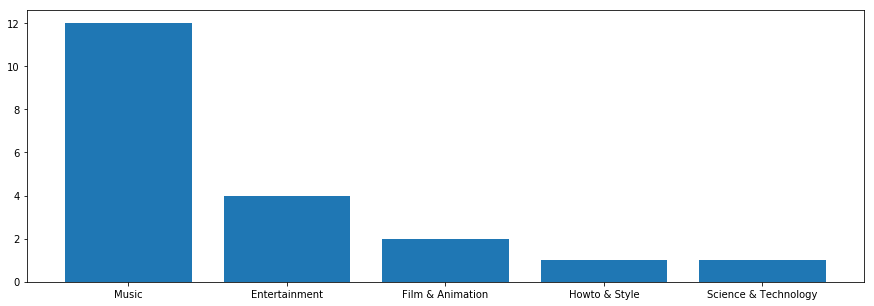

In [92]:
us_cat = us_top20_byMonth.loc['2017-11']['category'].value_counts()
gb_cat = gb_top20_byMonth.loc['2017-11']['category'].value_counts()
ca_cat = ca_top20_byMonth.loc['2017-11']['category'].value_counts()
de_cat = de_top20_byMonth.loc['2017-11']['category'].value_counts()
fr_cat = fr_top20_byMonth.loc['2017-11']['category'].value_counts()
plt.figure(figsize = (15,5))

p1= plt.bar(us_cat.index,us_cat)

p2 = plt.bar(gb_cat.index,gb_cat, bottom = us_cat)
# plt.title('GB')
# plt.subplot(2,3,3)
#p3 = plt.bar(ca_cat.index,ca_cat)
# plt.title('CA')
# plt.subplot(2,3,4)
#p4 = plt.bar(de_cat.index,de_cat)
# plt.title('DE')
# plt.subplot(2,3,5)
#p5 = plt.bar(fr_cat.index,fr_cat)
# plt.title('FR')
#plt.legend((p1,p2,p3,p4,p5),("US",'GB','CA','DE','FR'))